# Q5.1: Gradient Descent + Error Surface (California Housing)

Implement **gradient descent from scratch** for linear regression, and visualize how loss changes with weight/bias.

**Exam outputs:** MSE/MAE, loss curves, and a 3D error surface (loss vs $w$ and $b$).

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

## Step 2: Load and Prepare Data

### Load California Housing Dataset

In [2]:
from sklearn.datasets import fetch_openml

try:
    # Fetch specifically by name or ID (ID 43939 is usually the California Housing version)
    california = fetch_openml(name="california_housing", version=1, as_frame=True)

    # Extract data just like the native fetcher
    X_full = california.data.to_numpy()
    y = california.target.to_numpy()
    feature_names = california.feature_names
    dataset_name = "California Housing (via OpenML)"

    print(f"Success! Loaded {dataset_name}")
    print(f"Shape: {X_full.shape}")

except Exception as e:
    print(f"OpenML fetch failed: {e}")

Success! Loaded California Housing (via OpenML)
Shape: (20640, 9)


### Select 2 Features

In [3]:
# Select 2 Features (first two columns for either dataset)
X = X_full[:, [0, 1]]
print(f"\nSelected Features Shape: {X.shape}")
print(f"Features: {feature_names[0]}, {feature_names[1]}")


Selected Features Shape: (20640, 2)
Features: longitude, latitude


### Normalize Features

In [4]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

print(f"Normalized X Shape: {X_norm.shape}")
print(f"Normalized y Shape: {y_norm.shape}")

Normalized X Shape: (20640, 2)
Normalized y Shape: (20640,)


## Step 3: Initialize Neural Network Parameters

In [5]:
# Initialize weights and bias
np.random.seed(42)
w = np.random.randn(2) * 0.01
b = 0.0

print(f"Initial Weights: {w}")
print(f"Initial Bias: {b}")

Initial Weights: [ 0.00496714 -0.00138264]
Initial Bias: 0.0


## Step 4: Forward Propagation

In [6]:
def forward_prop(X, w, b):
    y_pred = X.dot(w) + b
    return y_pred

# Test forward propagation
y_pred = forward_prop(X_norm, w, b)
print(f"Predictions Shape: {y_pred.shape}")
print(f"First 5 predictions: {y_pred[:5]}")

Predictions Shape: (20640,)
First 5 predictions: [-0.00805084 -0.0080131  -0.00805622 -0.00808101 -0.00808101]


## Step 5: Calculate Error Metrics

### Squared Error and MSE

In [7]:
def calc_se(y_true, y_pred):
    return (y_true - y_pred) ** 2

def calc_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calc_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

error = y_norm - y_pred
se = calc_se(y_norm, y_pred)
mse = calc_mse(y_norm, y_pred)
mae = calc_mae(y_norm, y_pred)

print(f"Prediction Error (first 5): {error[:5]}")
print(f"Squared Error (first 5): {se[:5]}")
print(f"Mean Squared Error (normalized y): {mse:.6f}")
print(f"Mean Absolute Error (normalized y): {mae:.6f}")

Prediction Error (first 5): [2.13768233 1.32216924 1.26674963 1.17318108 1.18098052]
Squared Error (first 5): [4.56968573 1.7481315  1.60465463 1.37635384 1.394715  ]
Mean Squared Error (normalized y): 1.000097
Mean Absolute Error (normalized y): 0.790320


## Step 6: Gradient Descent Implementation

### Manual Weight Update

In [8]:
def gradient_descent(X, y, w, b, lr=0.01, epochs=100):
    n = len(y)
    loss_history = []

    for epoch in range(epochs):
        # Forward prop
        y_pred = X.dot(w) + b

        # Calculate MSE
        mse = np.mean((y - y_pred) ** 2)
        loss_history.append(mse)

        # Calculate gradients
        dw = (-2/n) * X.T.dot(y - y_pred)
        db = (-2/n) * np.sum(y - y_pred)

        # Update parameters
        w = w - lr * dw
        b = b - lr * db

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}: MSE = {mse:.6f}")

    return w, b, loss_history

# Train
w_trained, b_trained, loss_hist = gradient_descent(X_norm, y_norm, w, b, lr=0.1, epochs=100)
print(f"\nFinal Weights: {w_trained}")
print(f"Final Bias: {b_trained}")

# Final metrics (normalized scale)
y_pred_norm_final = forward_prop(X_norm, w_trained, b_trained)
mse_norm_final = calc_mse(y_norm, y_pred_norm_final)
mae_norm_final = calc_mae(y_norm, y_pred_norm_final)
print(f"Final MSE (normalized y): {mse_norm_final:.6f}")
print(f"Final MAE (normalized y): {mae_norm_final:.6f}")

# Optional: metrics on original target scale
y_pred_original = scaler_y.inverse_transform(y_pred_norm_final.reshape(-1, 1)).ravel()
mse_original = calc_mse(y, y_pred_original)
mae_original = calc_mae(y, y_pred_original)
print(f"Final MSE (original y): {mse_original:.6f}")
print(f"Final MAE (original y): {mae_original:.6f}")

Epoch 20: MSE = 0.892707
Epoch 40: MSE = 0.831202
Epoch 60: MSE = 0.797692
Epoch 80: MSE = 0.779435
Epoch 100: MSE = 0.769487

Final Weights: [-0.95947607 -1.01049465]
Final Bias: -9.147824616669566e-15
Final MSE (normalized y): 0.769131
Final MAE (normalized y): 0.674861
Final MSE (original y): 10241370032.816423
Final MAE (original y): 77874.087847


## Step 7: Plot Loss vs Weight

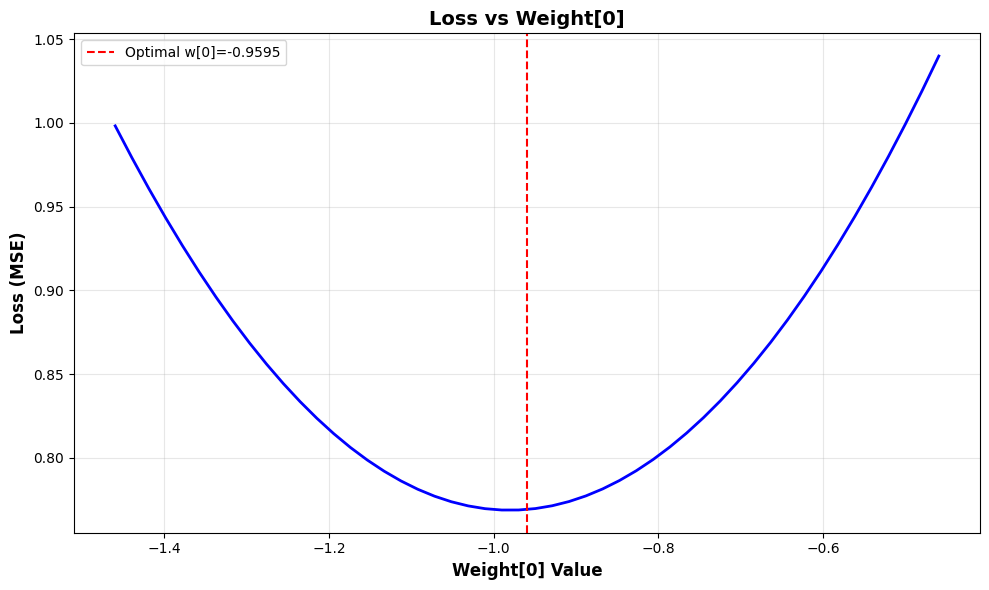

In [9]:
# Create weight range
w0_range = np.linspace(w_trained[0] - 0.5, w_trained[0] + 0.5, 50)
losses_w0 = []

for w0 in w0_range:
    w_temp = np.array([w0, w_trained[1]])
    y_pred = X_norm.dot(w_temp) + b_trained
    mse = calc_mse(y_norm, y_pred)
    losses_w0.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(w0_range, losses_w0, linewidth=2, color='blue')
plt.axvline(w_trained[0], color='red', linestyle='--', label=f'Optimal w[0]={w_trained[0]:.4f}')
plt.xlabel('Weight[0] Value', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Loss vs Weight[0]', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Plot Loss vs Bias

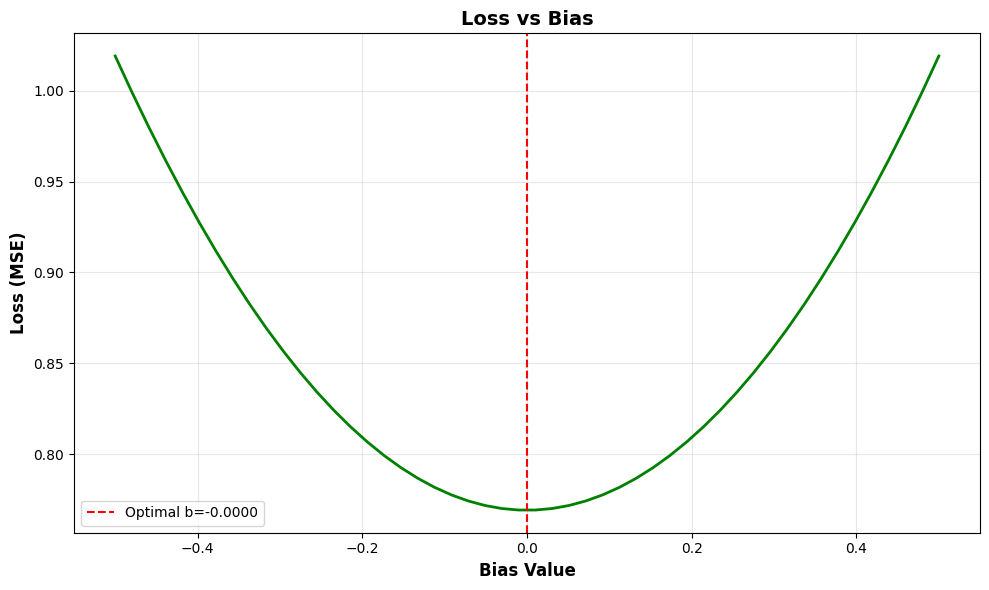

In [10]:
# Create bias range
b_range = np.linspace(b_trained - 0.5, b_trained + 0.5, 50)
losses_b = []

for b_temp in b_range:
    y_pred = X_norm.dot(w_trained) + b_temp
    mse = calc_mse(y_norm, y_pred)
    losses_b.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(b_range, losses_b, linewidth=2, color='green')
plt.axvline(b_trained, color='red', linestyle='--', label=f'Optimal b={b_trained:.4f}')
plt.xlabel('Bias Value', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Loss vs Bias', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 9: 3D Error Surface Plot

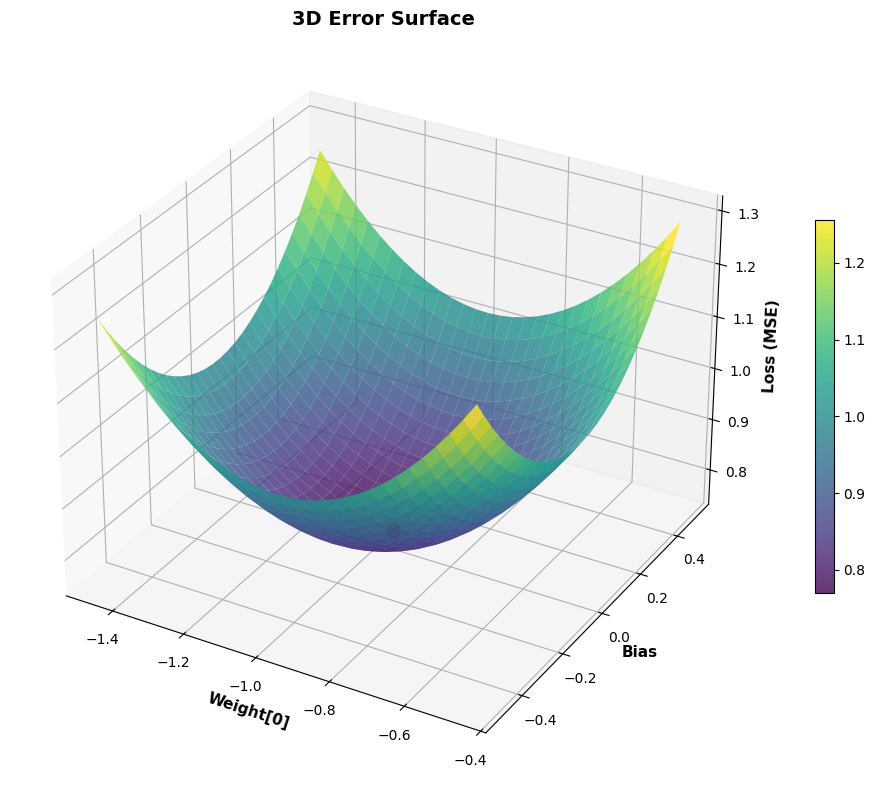

In [11]:
# Create mesh for 3D plot
w0_mesh = np.linspace(w_trained[0] - 0.5, w_trained[0] + 0.5, 30)
b_mesh = np.linspace(b_trained - 0.5, b_trained + 0.5, 30)
W0, B = np.meshgrid(w0_mesh, b_mesh)
Z = np.zeros_like(W0)

for i in range(len(w0_mesh)):
    for j in range(len(b_mesh)):
        w_temp = np.array([W0[j, i], w_trained[1]])
        y_pred = X_norm.dot(w_temp) + B[j, i]
        Z[j, i] = calc_mse(y_norm, y_pred)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W0, B, Z, cmap='viridis', alpha=0.8)
ax.scatter([w_trained[0]], [b_trained], [calc_mse(y_norm, forward_prop(X_norm, w_trained, b_trained))],
           color='red', s=100, label='Optimal Point')

ax.set_xlabel('Weight[0]', fontsize=11, fontweight='bold')
ax.set_ylabel('Bias', fontsize=11, fontweight='bold')
ax.set_zlabel('Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('3D Error Surface', fontsize=14, fontweight='bold')
fig.colorbar(surf, shrink=0.5)
plt.tight_layout()
plt.show()

## Summary

**Key Results:**
- Manual gradient descent implemented from scratch
- Loss decreases over iterations
- 3D surface shows convex optimization landscape
- Red point marks optimal parameters